<a href="https://colab.research.google.com/github/Git-Hub-Ran/Python/blob/Dev/notebooks/python_basics/02-mini-etl-pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: left">

# 🐍 Mini ETL Pipeline in Python

---

## 📝 Task Description

**Goal:** Implement a mini **ETL pipeline** using Python and pandas.

### Steps:
1. 📂 **Load a raw data file**  
   e.g., a CSV of sales or sensor data.
2. 🧹 **Clean / Transform the data**  
   - Filter, aggregate, or modify columns as needed.
3. 📊 **Output a summary or visualization**  
   - Aggregate totals per category  
   - Plot the results

This project helps you **solidify Python skills** and demonstrates your ability to apply **data engineering principles** in code.



In [80]:
import pandas as pd
import matplotlib.pyplot as plt

#Read a csv file with Sales data:
url = "https://gist.githubusercontent.com/denandreychuk/b9aa812f10e4b60368cff69c6384a210/raw/100%20Sales%20Records.csv"
df = pd.read_csv(url)

#Drop the rows where at least one element is missing:
df.dropna()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [81]:
#Chacking if 'Order ID' can be an index:
print(df['Order ID'].is_unique)

True


In [82]:
#Define 'Order ID' as Index:
df.set_index('Order ID')

#Filter on Europe Countries:
europe_data = df.loc[df.Region.isin(["Europe"])]

#Replace spaces in column names with "_"
europe_data.columns = europe_data.columns.str.replace(" ", "_")
print(europe_data.head())
#Show only Switzerland data:
#print(europe_data.loc[europe_data.Country.isin(['Switzerland'])])

    Region   Country        Item_Type Sales_Channel Order_Priority Order_Date  \
2   Europe    Russia  Office Supplies       Offline              L   5/2/2014   
15  Europe  Bulgaria          Clothes        Online              M  4/23/2012   
20  Europe    Norway        Baby Food        Online              L  5/14/2014   
21  Europe  Portugal        Baby Food        Online              H  7/31/2015   
24  Europe  Moldova     Personal Care        Online              L   5/7/2016   

     Order_ID  Ship_Date  Units_Sold  Unit_Price  Unit_Cost  Total_Revenue  \
2   341417157   5/8/2014        1779      651.21     524.96     1158502.59   
15  972292029   6/3/2012        1673      109.28      35.84      182825.44   
20  819028031  6/28/2014        7450      255.28     159.42     1901836.00   
21  860673511   9/3/2015        1273      255.28     159.42      324971.44   
24  740147912  5/10/2016        5070       81.73      56.67      414371.10   

    Total_Cost  Total_Profit  
2    933903.8

In [83]:

#Shows amount of orders per country in Europe:
#grouped=europe_data.groupby('Country').Country.count().rename('Count')

#Show Total_Profit per Country in Europe:
grouped_data=europe_data.groupby(['Country']).Total_Profit.sum()

#Sort result Descending:
grouped_data.sort_values(ascending=False)


,Total_Profit
Country,
Iceland,1541705.29
Switzerland,1512729.45
Romania,1375311.70
Lithuania,1046233.75
Monaco,825738.04
Norway,794398.84
Spain,747939.49
Bulgaria,626223.87
Macedonia,575916.48


In [84]:

#Show statistics on the data and converting values to integers:
europe_data.describe().astype(int)

,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
count,22,22,22,22,22,22,22
mean,584377033,4459,328,223,1516769,1012999,503769
std,270293676,3049,226,183,1548707,1127171,491553
min,166460740,171,47,31,22312,15470,6841
25%,342492508,1788,109,56,244339,151829,122238
50%,639155232,4586,255,159,1007738,613822,385454
75%,811120879,7744,437,263,2497026,1905516,739493
max,972292029,8867,668,524,5396577,4350343,1541705


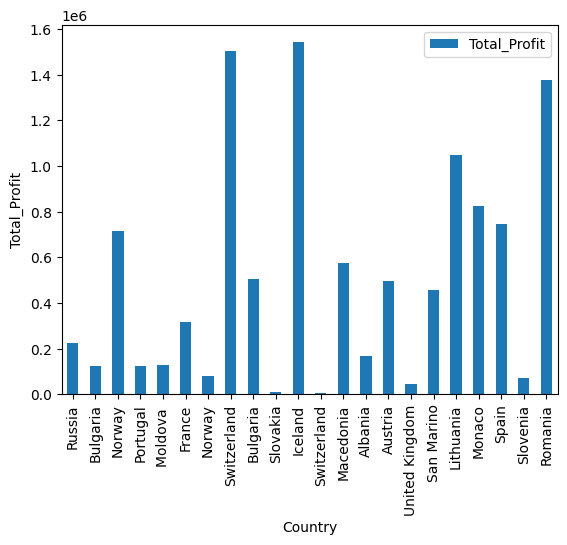

In [85]:
#Plot the results:
europe_data.plot(x='Country',y='Total_Profit', kind='bar')
plt.ylabel("Total_Profit")
plt.show()